Here's a possible solution for HW4.  

In [1]:
function julia_set(R::Function, xs::AbstractArray{T,1}, ys::AbstractArray{T,1},
        n_iter::Int, escape_tol::T) where {T<:AbstractFloat}
    
    CT = Complex{T}
    nx = length(xs)
    ny = length(ys)
    
    # for use with abs2
    esc2 = escape_tol^2
    
    A = Array{Int}(ny,nx)
    for j = 1:nx
        for i = 1:ny
            z = xs[j] + 1im*ys[i]
            diverged = Int(0)
            for k = 1:n_iter
                z = R(z)
                if abs2(z) > esc2
                    diverged = k
                    break
                end
            end
            A[i,j] = (diverged == 0) ? n_iter + 1 : diverged
        end
    end
    
    return A
end

julia_set (generic function with 1 method)

Some examples, with some parameters taken from examples in [Julia Jewels](http://mcgoodwin.net/julia/juliajewels.html)

In [2]:
using PyPlot

In [21]:
# create some rational functions and precompile them
z = 2. + 1im
R1{T}(z::Complex{T})::Complex{T} = z^2 - 0.4 + 0.6im
z = R1(z)
R2{T}(z::Complex{T})::Complex{T} = z^2 + 0.3 + 0.6im
z = R2(z)
R3{T}(z::Complex{T})::Complex{T} = z^5 + 0.8 + 0.6im
z = R3(z)
R4{T}(z::Complex{T})::Complex{T} = (z^4 + 0.8 + 0.6im)/(z^2 - z)
z = R4(z)

-1.589354538069839e14 + 2.8664945888486525e14im

In [5]:
xs = linspace(-1.5,1.5,2000)
ys = linspace(-1.5,1.5,2000)
n_iter = 1000
escape_tol = 10.0^5
@time img = julia_set(R1, xs, ys, n_iter, escape_tol)
;

  1.298615 seconds (6 allocations: 30.518 MiB, 1.60% gc time)


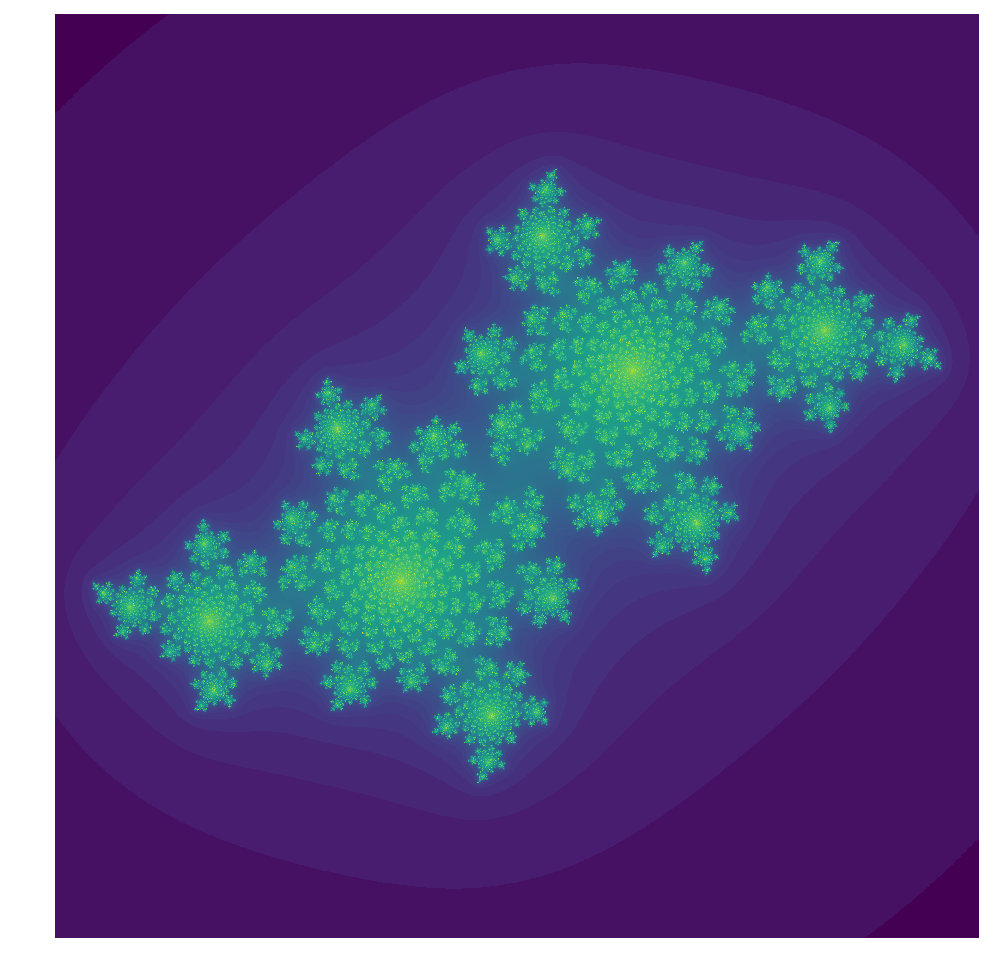

In [6]:
figure(figsize=(12,12))
imshow(log2.(img))
axis("off")
;

In [8]:
xs = linspace(-1.5,1.5,2000)
ys = linspace(-1.5,1.5,2000)
n_iter = 1000
escape_tol = 10.0^5
@time img = julia_set(R2, xs, ys, n_iter, escape_tol)
;

  0.618246 seconds (6 allocations: 30.518 MiB, 0.52% gc time)


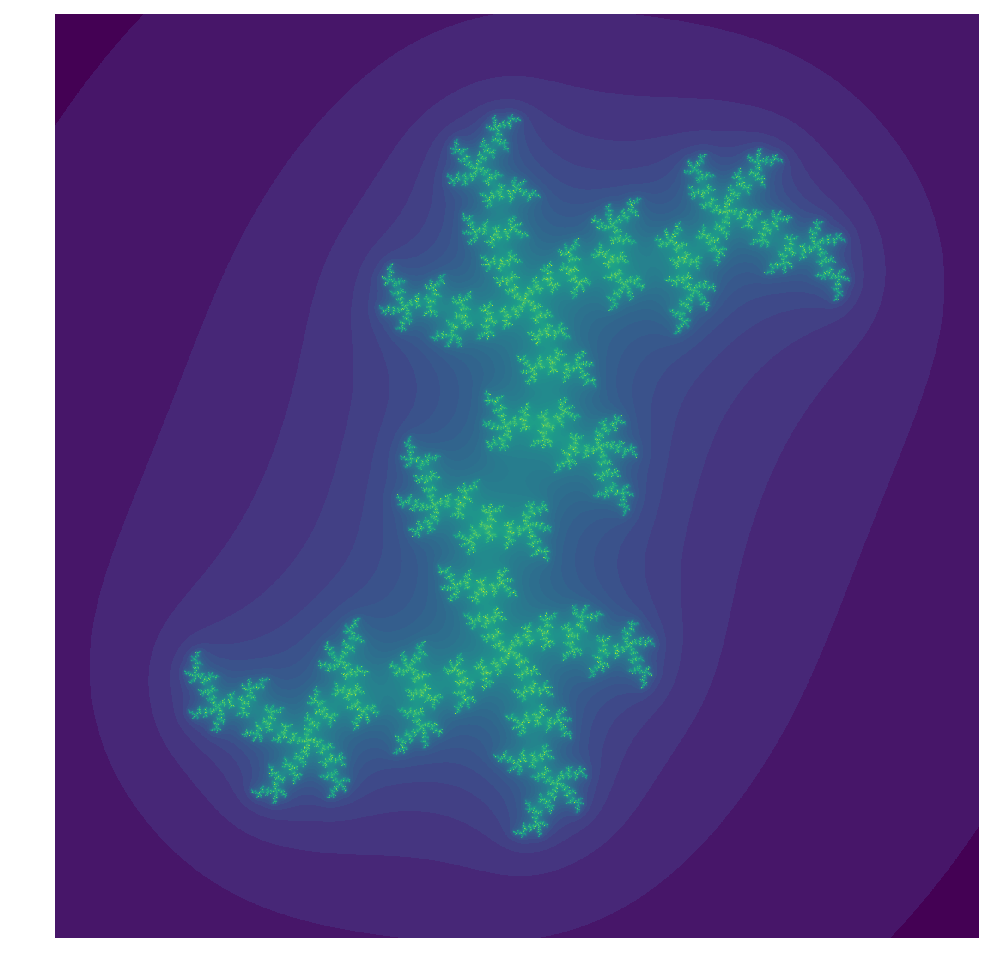

In [9]:
figure(figsize=(12,12))
imshow(log2.(img))
axis("off")
;

In [11]:
xs = linspace(-1.5,1.5,2000)
ys = linspace(-1.5,1.5,2000)
n_iter = 1000
escape_tol = 10.0^5
@time img = julia_set(R3, xs, ys, n_iter, escape_tol)
;

  1.420107 seconds (6 allocations: 30.518 MiB, 1.89% gc time)


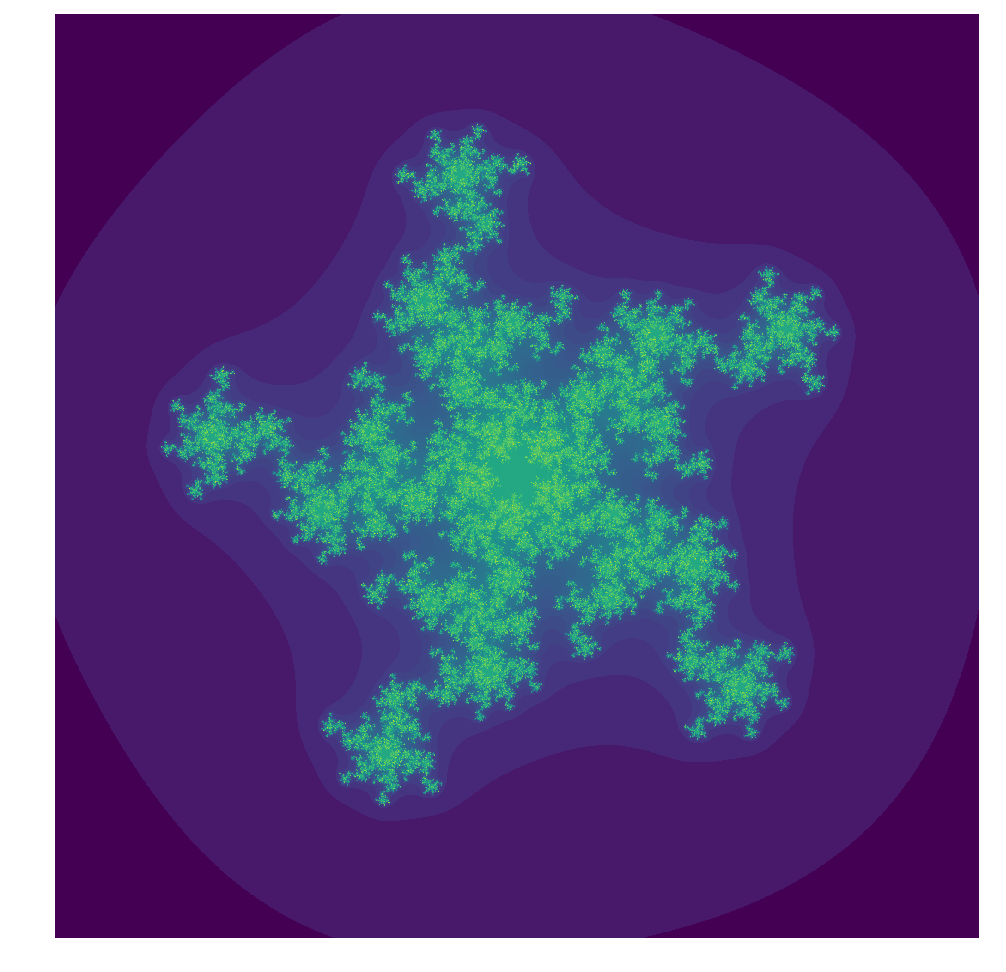

In [12]:
figure(figsize=(12,12))
imshow(log2.(img))
axis("off")
;

In [24]:
xs = linspace(-2.5,2.5,2000)
ys = linspace(-2.5,2.5,2000)
n_iter = 1000
escape_tol = 10.0^5
@time img = julia_set(R4, xs, ys, n_iter, escape_tol)
;

  0.896685 seconds (11 allocations: 30.518 MiB, 0.32% gc time)


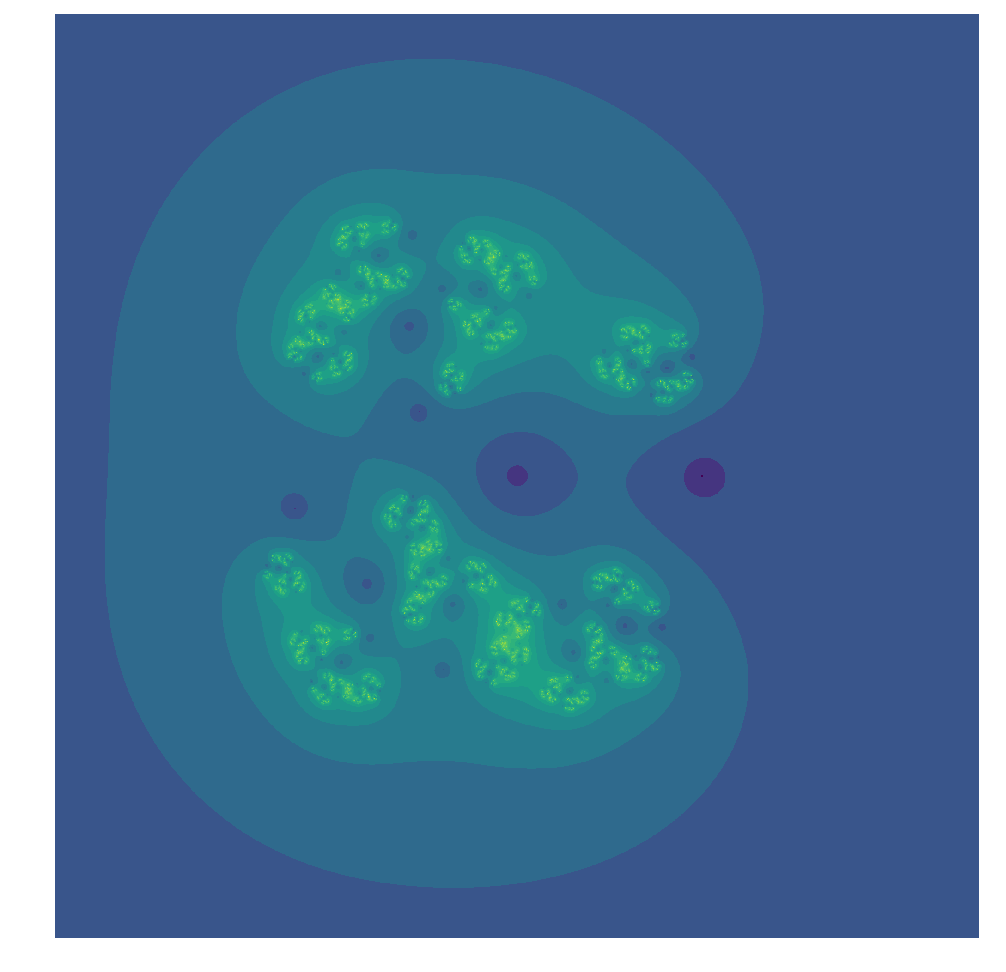

In [25]:
figure(figsize=(12,12))
imshow(log2.(img))
axis("off")
;